In [1]:
# mount drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [12]:
# setup
import torch

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

#import MNIST
from torchvision import datasets
from torchvision.transforms import ToTensor
train_data_full = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,
)
test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)

# print('Train data set:', len(train_data))
# print('Test data set:', len(test_data))

# # train_set_size = 100
# # waste_set_size = len(train_data) - train_set_size
# # train_data, waste_data = torch.utils.data.random_split(train_data, [train_set_size, waste_set_size])

# # print('='*30)
# # print('Train data set:', len(train_data))
# # print('Test data set:', len(test_data))
# # print('Valid data set:', len(waste_data))

# print(type(train_data))

range(0, 25)


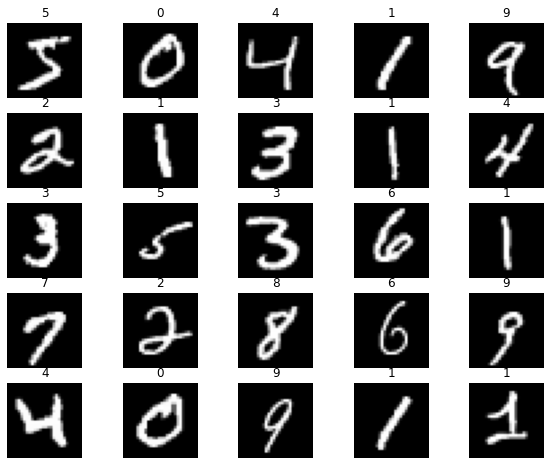

In [13]:
# look at datasets
import matplotlib.pyplot as plt

# compare firt 25 images
test_ind = range(0, 25)
print(test_ind)


# # compare 25 images randomly
# import random
# test_ind = random.sample(range(100), 25)
# print(test_ind)

figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = test_ind[i - 1] + 0
    img, label = train_data_full[sample_idx]
    # img = train_data_erasing[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [20]:
# construct training data with 10 labels each, 5 each from first 30000
indices = {}
for i in range(20000):
  label = train_data_full.targets[i].item()
  if label in indices:
    if len(indices[label]) < 5:
      indices[label].append(i)
    else:
      pass
  if label not in indices:
    indices[label] = [i]

# get 50 from last 30000
for i in range(30000, 50000):
  label = train_data_full.targets[i].item()
  if label in indices:
    if len(indices[label]) < 10:
      indices[label].append(i)
    else:
      pass
  if label not in indices:
    indices[label] = [i]


# dump into an array
subset100_indices = []
for i in range(10):
  subset100_indices.extend(indices[i])
print(subset100_indices)

# train_data_full.indices = subset100_indices
subset_labels = train_data_full.targets[subset100_indices]

train_data_100 = torch.utils.data.Subset(train_data_full, subset100_indices)
# print(train_data_100.indices)


# ensure label count is correct
# print(subset_labels)
labels_count = {}
for tensor in subset_labels:
  if tensor.item() in labels_count:
    labels_count[tensor.item()] += 1
  else:
    labels_count[tensor.item()] = 1
  # print(tensor.item())
print(labels_count)

[1, 21, 34, 37, 51, 30009, 30034, 30037, 30044, 30051, 3, 6, 8, 14, 23, 30007, 30031, 30035, 30043, 30047, 5, 16, 25, 28, 76, 30014, 30027, 30032, 30054, 30055, 7, 10, 12, 27, 30, 30000, 30002, 30011, 30040, 30041, 2, 9, 20, 26, 53, 30005, 30006, 30016, 30039, 30052, 0, 11, 35, 47, 65, 30012, 30020, 30028, 30030, 30042, 13, 18, 32, 36, 39, 30004, 30023, 30024, 30025, 30033, 15, 29, 38, 42, 52, 30001, 30008, 30015, 30017, 30018, 17, 31, 41, 46, 55, 30013, 30019, 30026, 30029, 30038, 4, 19, 22, 33, 43, 30003, 30010, 30022, 30049, 30069]
{0: 10, 1: 10, 2: 10, 3: 10, 4: 10, 5: 10, 6: 10, 7: 10, 8: 10, 9: 10}


In [ ]:
# import matplotlib.pyplot as plt
# index = 10
# plt.imshow((train_data.data)[index], cmap='gray')
# plt.title('%i' % train_data.targets[index])
# plt.show()

In [ ]:
# train_set_size = 100
# waste_set_size = len(train_data) - train_set_size
# train_set, waste_set = torch.utils.data.random_split(train_data, [train_set_size, waste_set_size])
# print(len(train_set), len(waste_set))

In [ ]:
# x, y = train_set[0]
# print(x.shape, y)

In [21]:
# store locally train set and test set
def save_data(loaders, name):
  path = f'/content/gdrive/My Drive/Research/{name}.pth'
  print(f'Saving {name} model...')
  torch.save(loaders, path)
  print(f'{name} saved successfully.')

save_data(train_data_100, 'train_data100')
# save_data(test_data, 'test_data10000')

Saving train_data100 model...
train_data100 saved successfully.


In [ ]:
# load training data and testing data
train_data = torch.load(f'/content/gdrive/My Drive/Research/train_data100.pth')
test_data = torch.load(f'/content/gdrive/My Drive/Research/datasets/test_data10000.pth')

train_data_100 = torch.utils.data.Subset(train_data_full, train_data.indices)


In [ ]:
x, y = train_data[0]
print(x.shape, y)
print(train_data.indices)

torch.Size([1, 28, 28]) 0
[1, 21, 34, 37, 51, 56, 63, 68, 69, 75, 3, 6, 8, 14, 23, 24, 40, 59, 67, 70, 5, 16, 25, 28, 76, 82, 109, 117, 120, 122, 7, 10, 12, 27, 30, 44, 49, 50, 74, 86, 2, 9, 20, 26, 53, 58, 60, 61, 64, 89, 0, 11, 35, 47, 65, 100, 132, 138, 145, 173, 13, 18, 32, 36, 39, 62, 66, 73, 83, 90, 15, 29, 38, 42, 52, 71, 79, 84, 91, 96, 17, 31, 41, 46, 55, 85, 94, 97, 125, 137, 4, 19, 22, 33, 43, 45, 48, 54, 57, 80]


In [ ]:
# preparing data. Only train on 100 data points, test as many as we like
from torch.utils.data import DataLoader
loaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=10, 
                                          shuffle=True, 
                                          num_workers=1),
    
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
}
loaders

{'test': <torch.utils.data.dataloader.DataLoader at 0x7f4a39560b50>,
 'train': <torch.utils.data.dataloader.DataLoader at 0x7f4a39560ad0>}

In [ ]:
# # save this file to drive so we use the SAME batches everytime
# def save_loaders(loaders, name):
#   path = f'/content/gdrive/My Drive/Research/{name}.pth'
#   print(f'Saving {name} model...')
#   torch.save(loaders, path)
#   print(f'{name} saved successfully.')

# save_loaders(loaders, 'loaders_10')

In [ ]:
# # load the loaders we saved to drive
# loaders = torch.load(f'/content/gdrive/My Drive/Research/loaders_10.pth')

In [ ]:
# define our CNN

import torch.nn as nn
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=16,            
                kernel_size=5,              
                stride=1,                   
                padding=2,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(16, 32, 5, 1, 2),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)       
        output = self.out(x)
        return output, x    # return x for visualization

# define loss function and optimizer, initialize network
loss_func = nn.CrossEntropyLoss()   
loss_func
from torch import optim
cnn = CNN()
print(cnn)
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)   
optimizer

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [ ]:
from pickle import bytes_types
# train
from torch.autograd import Variable
num_epochs = 10
def train(num_epochs, cnn, loaders):
    
    cnn.train()
        
    # Train the model
    # total_step = 10 # 100 training examples, 10 per batch
    # total_step = 5 # 50 training examples, 10 per batch
    # total_step = 3 # 30 training examples, 10 per batch
    # total_step = 5 # 25 training examples, 5 per batch
    # total_step = 10 # 1000 training examples, 100 per batch
    # total_step = 10 # 500 training examples, 50 per batch

    total_step = 10  # running 10 * batch size per epochs

    for epoch in range(num_epochs):
        # count = 0
        for i, (images, labels) in enumerate(loaders['train']):
            # if count >= total_step: break

            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images)   # batch x size batch_size
            b_y = Variable(labels)   # batch y
            output = cnn(b_x)[0]               
            loss = loss_func(output, b_y)

            # print(b_y)
            
            # clear gradients for this training step   
            optimizer.zero_grad()           
            
            # backpropagation, compute gradients 
            loss.backward()    
            # apply gradients             
            optimizer.step()

            # increment count
            # count += 1         
            
            # if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
            pass
        
        pass
    
    
    pass
train(num_epochs, cnn, loaders)

IndexError: ignored

In [ ]:
# testing
def test():
    # Test the model
    cnn.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders['test']:
            test_output, last_layer = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
            pass
    print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)
    
    pass
test()

Test Accuracy of the model on the 10000 test images: 0.84
